<a href="https://colab.research.google.com/github/MaisterLupo/MaisterLupo/blob/main/Pr_ML_3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries

In [135]:
# libraries for EDA and ML
import sklearn
import random
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import random as rd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm, tree, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import statsmodels.api as sm
# libraries for DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import cross_val_score

EDA (Exploratory Data Analysis)

In [136]:
df = pd.read_excel('/content/Dataset 2 – Early-stage diabetes risk prediction dataset (ESDRPD).xlsx')

######## Explorative Data Analysis #########
print(df.head())

df.shape
# Our dataset shows 17 features. Our Target features is Class.

df.info()
# Our dataset shows no null-values and no missing values

df.nunique()
# Our dataset has 15 asymmetric attributes. Age has discrete values.

###### Declaration of our target variable ########

df_copy = df
df_copy_target = df_copy['Class']

   Age Gender Polyuria Polydipsia Sudden weight loss Weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush Visual blurring Itching Irritability Delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  Partial paresis Muscle stiffness Alopecia Obesity     Class  
0              No              Yes      

####### Univariate Analysis on 'Class' feature #######

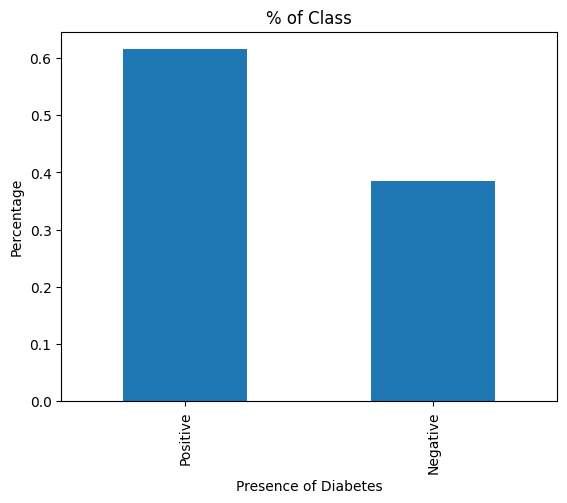

In [137]:
# we count the occurences of each class inside the data to understand the distribution of values in our dataset
df_copy_target.value_counts(normalize=True).plot(kind='bar')
plt.title("% of Class") # we have a prevalence of positive cases with respect to negatives. The dataset is not balanced
plt.xlabel('Presence of Diabetes')
plt.ylabel('Percentage')
plt.show()

####### Univariate Analysis on Age features #######

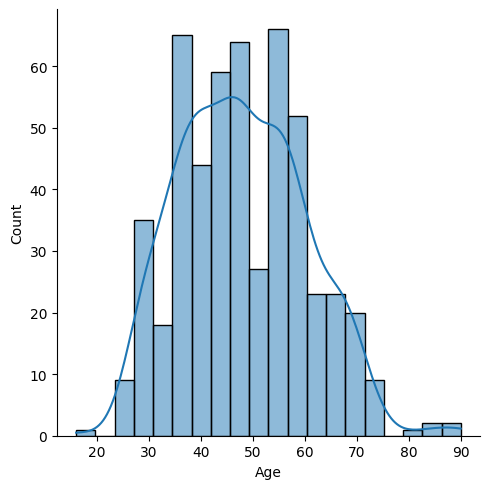

In [138]:
sns.displot(df_copy['Age'],bins=20, kde='True');

####### Univariate Analysis for all features #########

In [139]:
# We plot each variable to understand the distribution of the values in order to remove any other irrelevant features

print(df_copy['Gender'].value_counts(normalize=True))
print(df_copy['Polyuria'].value_counts(normalize=True))
print(df_copy['Polydipsia'].value_counts(normalize=True))
print(df_copy['Sudden weight loss'].value_counts(normalize=True))
print(df_copy['Weakness'].value_counts(normalize=True))
print(df_copy['Polyphagia'].value_counts(normalize=True))
print(df_copy['Genital thrush'].value_counts(normalize=True))
print(df_copy['Visual blurring'].value_counts(normalize=True))

Gender
Male      0.630769
Female    0.369231
Name: proportion, dtype: float64
Polyuria
No     0.503846
Yes    0.496154
Name: proportion, dtype: float64
Polydipsia
No     0.551923
Yes    0.448077
Name: proportion, dtype: float64
Sudden weight loss
No     0.582692
Yes    0.417308
Name: proportion, dtype: float64
Weakness
Yes    0.586538
No     0.413462
Name: proportion, dtype: float64
Polyphagia
No     0.544231
Yes    0.455769
Name: proportion, dtype: float64
Genital thrush
No     0.776923
Yes    0.223077
Name: proportion, dtype: float64
Visual blurring
No     0.551923
Yes    0.448077
Name: proportion, dtype: float64


####### Univariate Analysis for all features #########

In [140]:
print(df_copy['Itching'].value_counts(normalize=True))
print(df_copy['Irritability'].value_counts(normalize=True))
print(df_copy['Delayed healing'].value_counts(normalize=True))
print(df_copy['Partial paresis'].value_counts(normalize=True))
print(df_copy['Muscle stiffness'].value_counts(normalize=True))
print(df_copy['Alopecia'].value_counts(normalize=True))
print(df_copy['Obesity'].value_counts(normalize=True))
print(df_copy['Class'].value_counts(normalize=True))

Itching
No     0.513462
Yes    0.486538
Name: proportion, dtype: float64
Irritability
No     0.757692
Yes    0.242308
Name: proportion, dtype: float64
Delayed healing
No     0.540385
Yes    0.459615
Name: proportion, dtype: float64
Partial paresis
No     0.569231
Yes    0.430769
Name: proportion, dtype: float64
Muscle stiffness
No     0.625
Yes    0.375
Name: proportion, dtype: float64
Alopecia
No     0.655769
Yes    0.344231
Name: proportion, dtype: float64
Obesity
No     0.830769
Yes    0.169231
Name: proportion, dtype: float64
Class
Positive    0.615385
Negative    0.384615
Name: proportion, dtype: float64


######## Bivariate Analysis relationship between target variable and the variable Age ###########

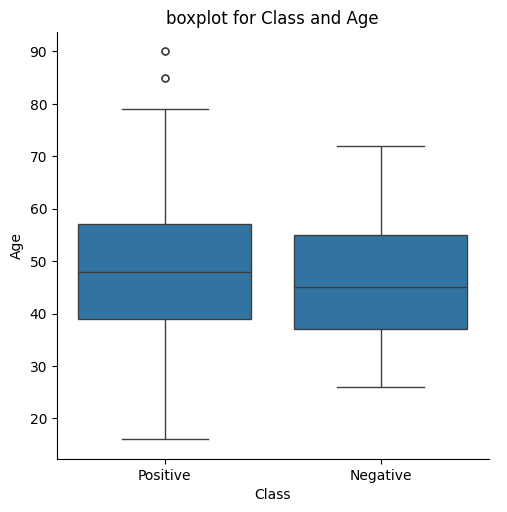

In [141]:
sns.catplot(x='Class', y='Age', data=df_copy, kind='box')
plt.title('boxplot for Class and Age')
plt.show()

############## Bivariate Analysis between Gender and Class ######################

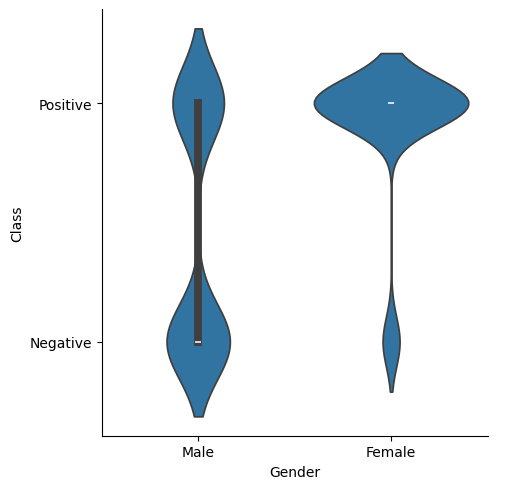

In [142]:
sns.catplot(data=df, x="Gender", y="Class", kind='violin')
plt.show()

################ Bivariate analysis between Gender and Polydipsia ##############

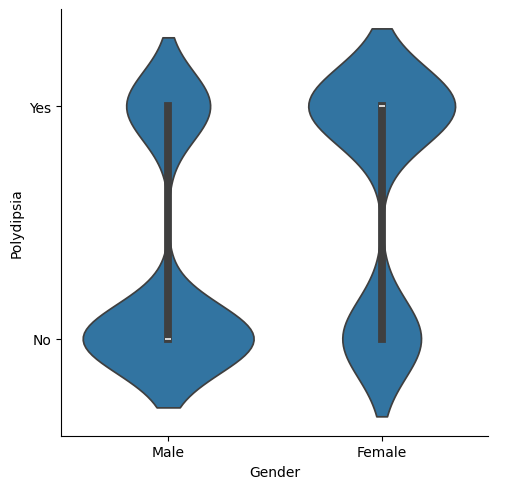

In [143]:
sns.catplot(data=df, x="Gender", y="Polydipsia", kind='violin')
plt.show()

Encoding features
Labels for all variables (except Age, Gender): 'No': 0, 'Yes': 1
Labels for Gender: 'Male': 0, 'Female': 1

In [144]:
# Instantiate the mapping
le = preprocessing.LabelEncoder()

# assigning the features

features = [f for f in df_copy.columns if f not in ["Age", 'Gender']]

# applying LE on the features
for feature in features:
  df_copy[feature] = le.fit_transform(df_copy[feature])

df_copy['Gender'] = le.fit_transform(df_copy['Gender'])

We plot each variable to understand the distribution of the values in order to remove any other irrelevant features

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Polyuria'}>],
       [<Axes: title={'center': 'Polydipsia'}>,
        <Axes: title={'center': 'Sudden weight loss'}>],
       [<Axes: title={'center': 'Weakness'}>,
        <Axes: title={'center': 'Polyphagia'}>]], dtype=object)

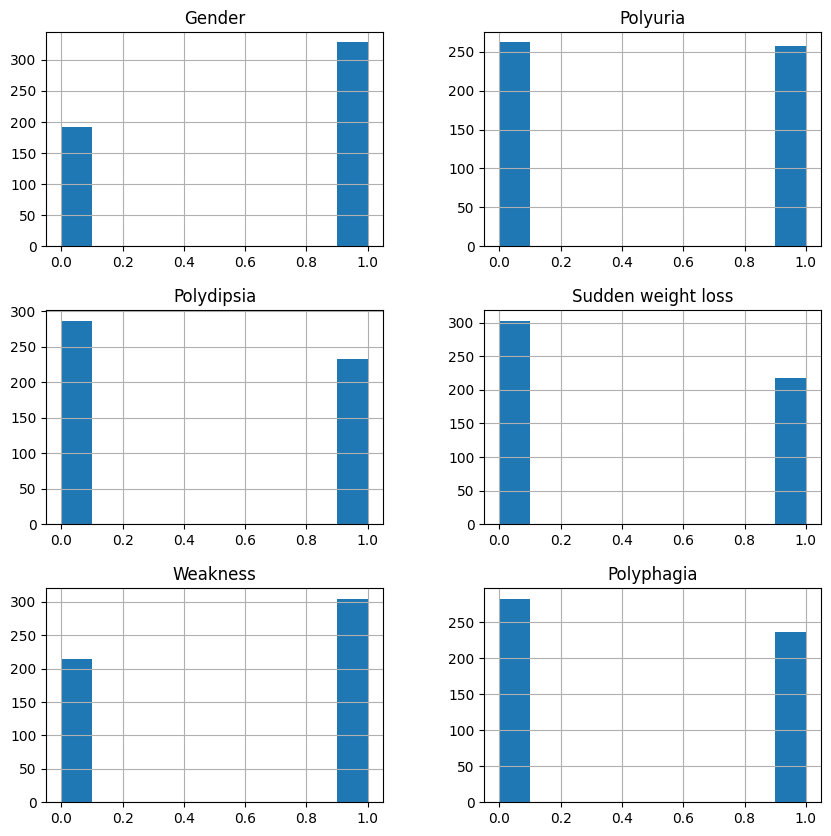

In [145]:
df_copy1 = df_copy.drop(['Age','Genital thrush', 'Visual blurring', 'Itching', 'Irritability','Delayed healing', 'Partial paresis','Muscle stiffness', 'Alopecia','Obesity','Class'], axis = 1)
df_copy1.hist(figsize=[10,10])

array([[<Axes: title={'center': 'Genital thrush'}>,
        <Axes: title={'center': 'Visual blurring'}>,
        <Axes: title={'center': 'Itching'}>],
       [<Axes: title={'center': 'Irritability'}>,
        <Axes: title={'center': 'Delayed healing'}>,
        <Axes: title={'center': 'Partial paresis'}>],
       [<Axes: title={'center': 'Muscle stiffness'}>,
        <Axes: title={'center': 'Alopecia'}>,
        <Axes: title={'center': 'Obesity'}>]], dtype=object)

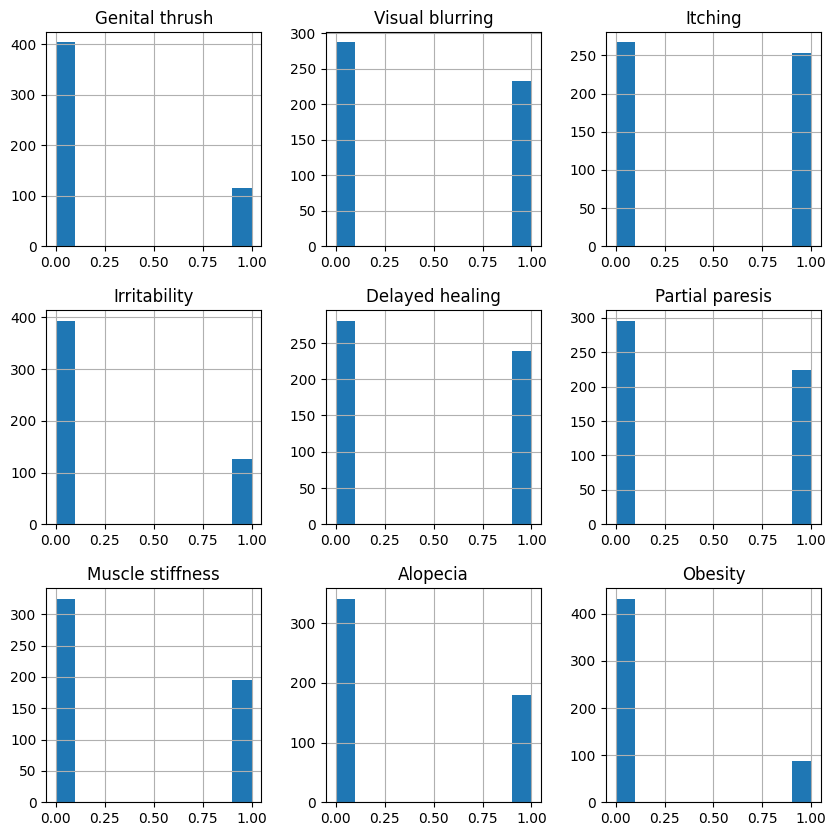

In [146]:
df_copy2 = df_copy.drop(['Age','Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss','Weakness', 'Polyphagia','Class'], axis = 1)
df_copy2.hist(figsize=[10,10])

We describe each column to understand if most of the data fall within one percentile. In this way we can remove variables that does not have a huge impact on the target variable

In [147]:
print(df_copy.describe().T)

                    count       mean        std   min   25%   50%   75%   max
Age                 520.0  48.028846  12.151466  16.0  39.0  47.5  57.0  90.0
Gender              520.0   0.630769   0.483061   0.0   0.0   1.0   1.0   1.0
Polyuria            520.0   0.496154   0.500467   0.0   0.0   0.0   1.0   1.0
Polydipsia          520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0
Sudden weight loss  520.0   0.417308   0.493589   0.0   0.0   0.0   1.0   1.0
Weakness            520.0   0.586538   0.492928   0.0   0.0   1.0   1.0   1.0
Polyphagia          520.0   0.455769   0.498519   0.0   0.0   0.0   1.0   1.0
Genital thrush      520.0   0.223077   0.416710   0.0   0.0   0.0   0.0   1.0
Visual blurring     520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0
Itching             520.0   0.486538   0.500300   0.0   0.0   0.0   1.0   1.0
Irritability        520.0   0.242308   0.428892   0.0   0.0   0.0   0.0   1.0
Delayed healing     520.0   0.459615   0.498846   0.0   0.0   0.

######### Multivariate analysis: we understand the positive and negative relationship between the indipendent variables #########

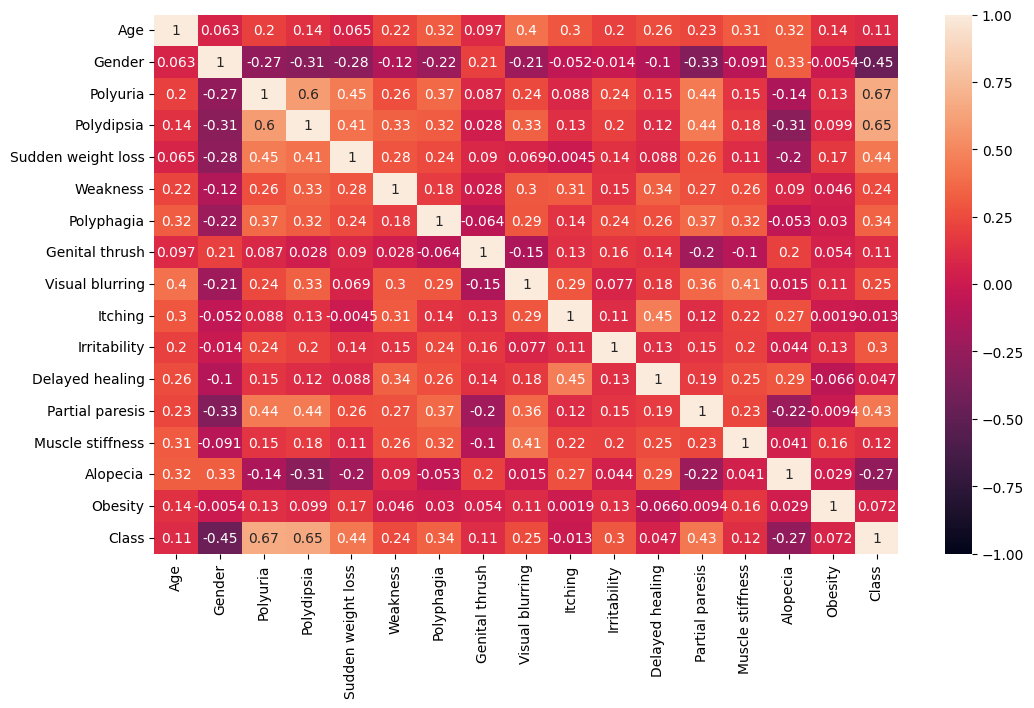

In [148]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_copy.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

- Age = all'aumentare dell'età aumenta il Visual Blurring/Muscle stiffness e Alopecia
- Gender = Le donne soffrono più di Polydipsia/Sudden weight loss/Partial Paresis e presentano più casi di Diabete
- Gender = Gli uomini soffrono di più di Genital thrush e Alopecia
- Polyuria = è correlata in modo positivo con la Polydipsia/Sudden weight loss/- Polyphagia/Partial Paresis e il diabete
- Polydipsia = è correlata positivamente con Polyuria/Sudden weight loss/Weakness/Polyphagia/Visual Blurring/Partial Paresis/Diabete
- Sudden Weight loss= è presente maggiormente nelle donne/ correlato positivamente con Polyuria/Polydipsia/Weakness/Diabete
- Weakness = correlato positivamente con Age/Polyuria/Polydipsia/Itching/delayed healing/Partial Paresis/muscle stiffness
- Polyphagia = correlato positivamente con Age/Polyuria/Polydipsia/Sudden Weight Loss/ Visual Blurring/ Partial paresis/ Muscle Stiffness/Diabete
- Genital Thrush = Più presente negli uomini
- Visual Blurring = correlato positivamente con l'età, presente maggiormente nelle donne, Polydipsia, Polyphagia, Itching, Partial Paresis, Muscle stiffness, Diabete
- Itching = correlato positivamente con weakness, Visual blurring, delayed healing
- Irritability = correlato positivamente con Polyuria
- Dealing healing = correlato positivamente con Age, weakness, itching, muscle stiffness, alopecia
- Partial paresis = correlato positivamente con Age, presente maggiormente nelle donne, polyuria, polydipsia, polyphagia, visual blurring, diabete e negativamente con Alopecia
- Muscle stiffness = correlato positivamente con Age, polyphagia, Visual blurring
Alopecia = correlato positivamente con Age, presente maggiormente negli uomini, negativamente correlato con Polydipsia, Itching, delayed healing e diabete
Obesity = non mostra particolari correlazioni
Diabete = Presente maggiormente nelle donne, correlato positivamente con Polyuria, Polydipsia, Sudden weight loss, Polyphagia, Partial Paresis, negativamente con Alopecia

Machine Learning Algorithms

In [149]:
######## Separation of our target variable from the dataset ########

df_copy = df_copy.drop(['Class'], axis = 1)

####### label enconding on our target variable

df_copy_target = le.fit_transform(df_copy_target)

######### Normalization #############
#------------------
transformer = MinMaxScaler()
transformer.fit(df_copy)
df_copy_norm = transformer.transform(df_copy)
#---------------------

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
train_x, test_x, train_y, test_y = train_test_split(df_copy_norm, df_copy_target, test_size=1 - train_ratio, random_state=42)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

print(train_x, val_x, test_x)
print('Train: {}, Val: {}, and Test: {}'.format(len(train_x), len(val_x), len(test_x)))
print('Total: {}'.format(len(train_x) + len(val_x) + len(test_x)))

[[0.27027027 0.         1.         ... 0.         0.         0.        ]
 [0.55405405 1.         0.         ... 1.         0.         0.        ]
 [0.75675676 1.         1.         ... 1.         1.         0.        ]
 ...
 [0.32432432 0.         1.         ... 1.         0.         0.        ]
 [0.55405405 1.         1.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 1.         1.         0.        ]] [[0.2972973  1.         1.         ... 0.         0.         0.        ]
 [0.43243243 0.         1.         ... 1.         0.         0.        ]
 [0.68918919 1.         0.         ... 1.         1.         1.        ]
 ...
 [0.37837838 1.         1.         ... 1.         1.         0.        ]
 [0.39189189 0.         0.         ... 0.         0.         0.        ]
 [0.40540541 1.         0.         ... 0.         1.         0.        ]] [[0.25675676 0.         1.         ... 0.         1.         0.        ]
 [0.54054054 1.         1.         ... 

Grid Search for SVC

In [150]:
####### Grid Search for SVC ######
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(train_x, train_y)


# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Grid Search for AdaBoost

In [151]:
# defining parameter range
param_grid = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, scoring='accuracy', verbose = 3)

# fitting the model for grid search
grid.fit(train_x, train_y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.0001, n_estimators=10;, score=0.795 total time=   0.0s
[CV 2/5] END learning_rate=0.0001, n_estimators=10;, score=0.849 total time=   0.0s
[CV 3/5] END learning_rate=0.0001, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END learning_rate=0.0001, n_estimators=10;, score=0.806 total time=   0.0s
[CV 5/5] END learning_rate=0.0001, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/5] END learning_rate=0.0001, n_estimators=50;, score=0.795 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, n_estimators=50;, score=0.849 total time=   0.1s
[CV 3/5] END learning_rate=0.0001, n_estimators=50;, score=0.890 total time=   0.1s
[CV 4/5] END learning_rate=0.0001, n_estimators=50;, score=0.806 total time=   0.1s
[CV 5/5] END learning_rate=0.0001, n_estimators=50;, score=0.792 total time=   0.1s
[CV 1/5] END learning_rate=0.0001, n_estimators=100;, score=0.795 total time=   0.2s
[CV 2/5] END 

Grid search for LGB

In [152]:
# defining parameter range
param_grid = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(lgb.LGBMClassifier(), param_grid, verbose=1, cv=4, n_jobs=-1)

# fitting the model for grid search
grid.fit(train_x, train_y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 4 folds for each of 1728 candidates, totalling 6912 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Info] Number of positive: 218, number of negative: 145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600551 -> initscore=0.407761
[LightGBM] [Info] Start training from score 0.407761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
{'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifiers

In [153]:
####### Classifiers #########

clf_svc = svm.SVC(C = 10, gamma =  1, kernel = 'rbf')
clf_r = RandomForestClassifier(n_estimators=50, random_state=42)
clf_a = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
clf_d = DecisionTreeClassifier()
clf_LGB = lgb.LGBMClassifier()

Model fit SVC

In [154]:
clf_svc.fit(train_x, train_y)

SVC(C=10, gamma=1)

Model Predict SVC

In [155]:
pred_y = clf_svc.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y), pred_y))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_svc.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9743589743589743


Model fit Random Forest

In [156]:
clf_r.fit(train_x, train_y)

RandomForestClassifier(n_estimators=50, random_state=42)

Model Predict RF

In [157]:
pred_y_r = clf_r.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_r), pred_y_r))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_r.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  1.0


Plotting Random Forest graph

Average number of nodes 71
Average maximum depth 9


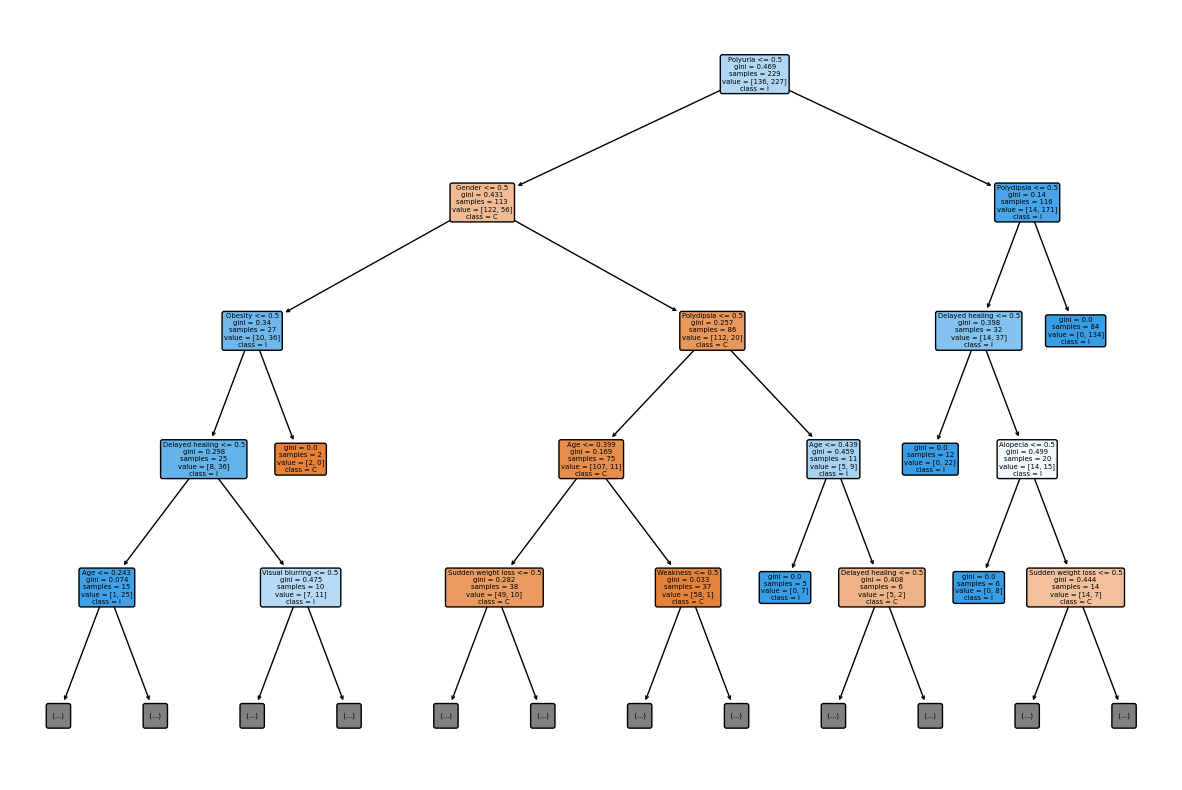

In [158]:
# Stats about the trees in random forest
n_nodes = []
max_depths = []
for ind_tree in clf_r.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# plot first tree (index 0)
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(clf_r.estimators_[0], max_depth=4, feature_names = df.columns[:-1], class_names = df.columns[-1], filled=True, impurity=True, rounded=True)
plt.show()


Model Fit AdaBoost

In [159]:
clf_a.fit(train_x, train_y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

Model Predict AB

In [160]:
pred_y_a = clf_a.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_a), pred_y_a))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_a.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9615384615384616


Model fit Decision Tree

In [161]:
clf_d.fit(train_x, train_y)

DecisionTreeClassifier()

Model Predict DT

In [162]:
pred_y_d = clf_d.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_d), pred_y_d))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_d.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9615384615384616


Ploting Decision Tree

Decision tree structure has 59 nodes and has the following tree structure:



[Text(0.6333333333333333, 0.9166666666666666, 'Polyuria <= 0.5\ngini = 0.48\nsamples = 363\nvalue = [145, 218]\nclass = l'),
 Text(0.4, 0.75, 'Gender <= 0.5\ngini = 0.403\nsamples = 186\nvalue = [134, 52]\nclass = C'),
 Text(0.21666666666666667, 0.5833333333333334, 'Alopecia <= 0.5\ngini = 0.434\nsamples = 44\nvalue = [14, 30]\nclass = l'),
 Text(0.13333333333333333, 0.4166666666666667, 'Age <= 0.25\ngini = 0.257\nsamples = 33\nvalue = [5, 28]\nclass = l'),
 Text(0.06666666666666667, 0.25, 'Visual blurring <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = C'),
 Text(0.03333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2, 0.25, 'Irritability <= 0.5\ngini = 0.077\nsamples = 25\nvalue = [1, 24]\nclass = l'),
 Text(0.16666666666666666, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.23333333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.3, 0.4166666666666667, 'Delayed healing <= 0.5\ngini = 0.298\nsamples = 1

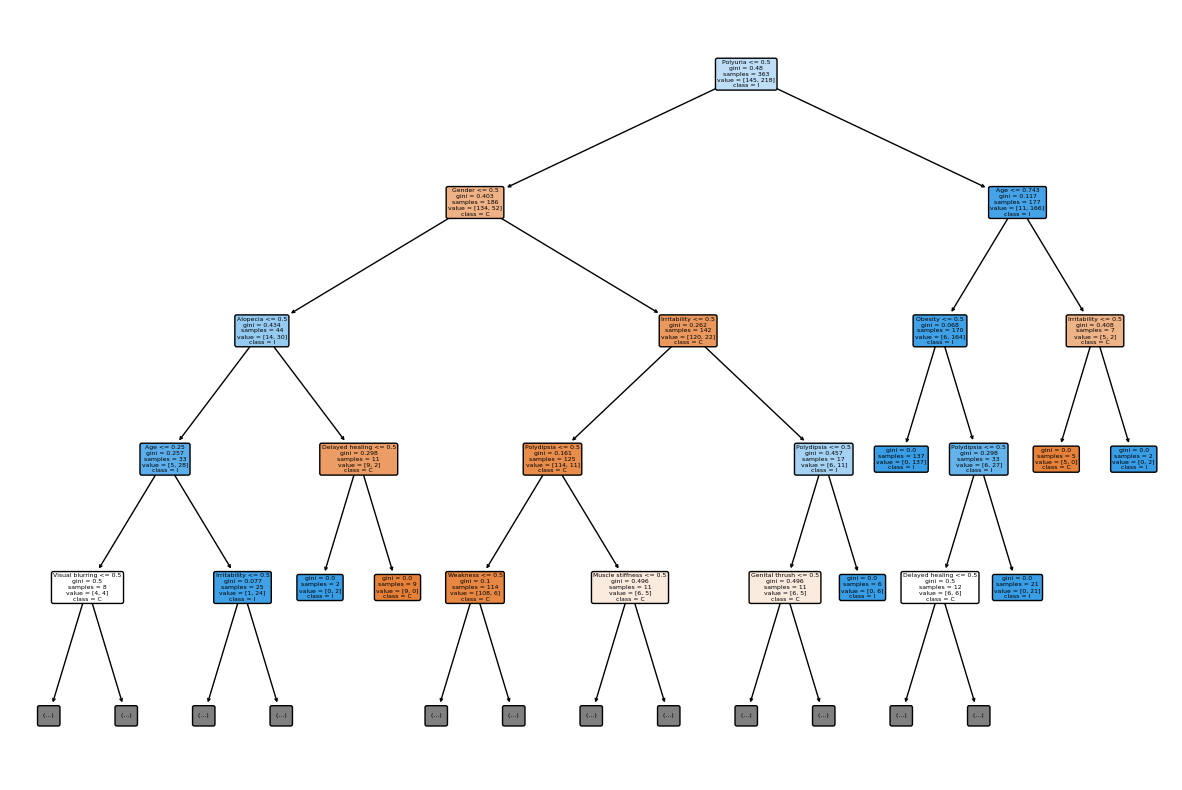

In [163]:
n_nodes = clf_d.tree_.node_count
print("Decision tree structure has {n} nodes and has the following tree structure:\n".format(n=n_nodes))
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf_d, max_depth=4, feature_names = df.columns[:-1], class_names = df.columns[-1], filled=True, impurity=True, rounded=True)

Model fit LB

In [164]:
clf_LGB.fit(train_x, train_y)

[LightGBM] [Info] Number of positive: 218, number of negative: 145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600551 -> initscore=0.407761
[LightGBM] [Info] Start training from score 0.407761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

Model Predict LB

In [165]:
pred_y_lg = clf_LGB.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_lg), pred_y_lg))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_LGB.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9871794871794872


Plotting LGB

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss', 'Weakness', 'Polyphagia', 'Genital thrush', 'Visual blurring', 'Itching', 'Irritability', 'Delayed healing', 'Partial paresis', 'Muscle stiffness', 'Alopecia', 'Obesity']


<Axes: >

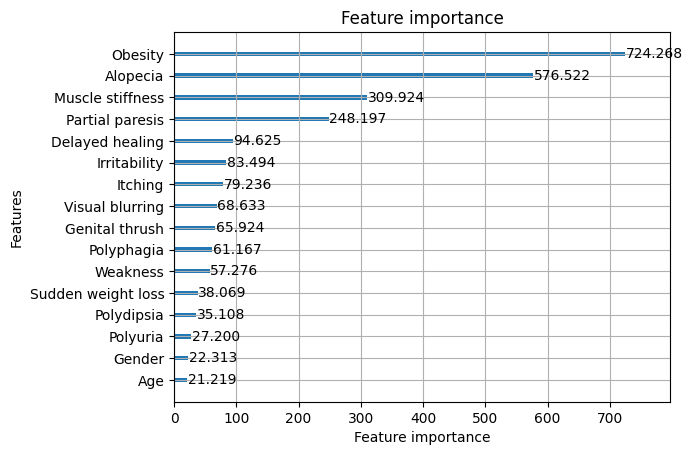

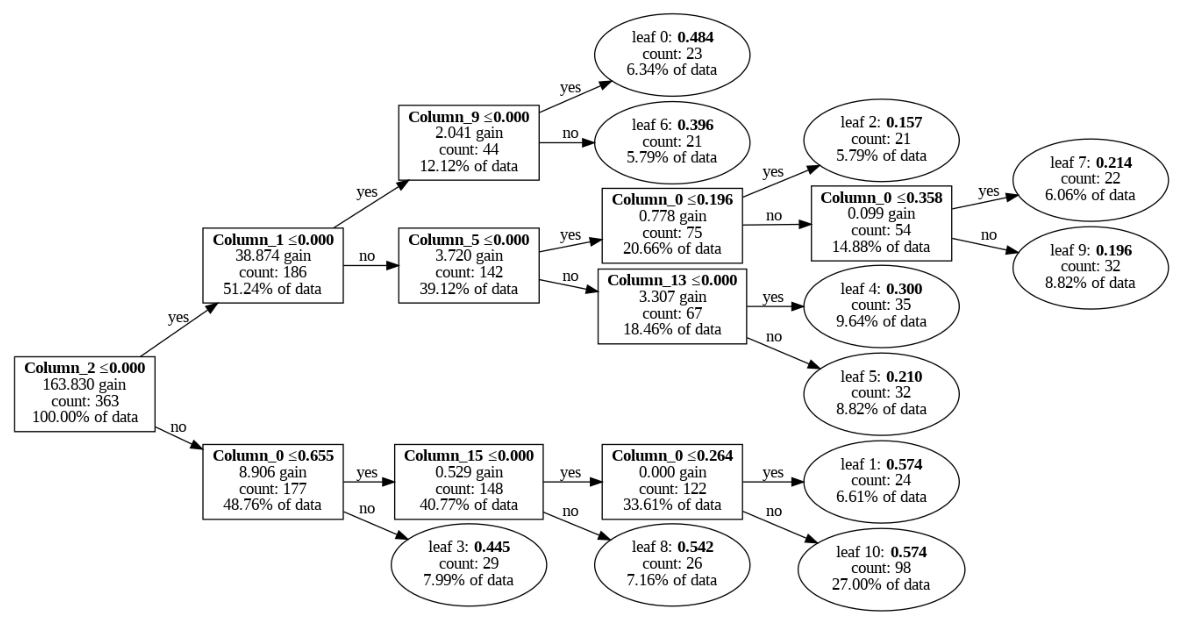

In [166]:
feat = [v for v in df_copy.columns]
print(feat)

ax = lgb.plot_importance(clf_LGB, title='Feature importance', xlabel='Feature importance', ylabel='Features', importance_type='gain')
ax.set_yticklabels(feat)
lgb.plot_tree(clf_LGB, ax=None, tree_index=0, figsize=(15, 10), dpi=None, show_info=['split_gain','internal_count', 'leaf_count', 'data_percentage'] , precision=3, orientation='horizontal', example_case=None)


Accuracy ratios

In [167]:
# accuracy score svc
print('Final Accuracy with SVC: {:.3f}'.format(accuracy_score(test_y, pred_y)))
# accuracy score random forest
print('Final Accuracy with Random Forest: {:.3f}'.format(accuracy_score(test_y, pred_y_r)))
# accuracy score AdaBoost
print('Final Accuracy with AdaBoost: {:.3f}'.format(accuracy_score(test_y, pred_y_a)))
# accuracy score DecisionTree
print('Final Accuracy with Decision Tree: {:.3f}'.format(accuracy_score(test_y, pred_y_d)))
# accuracy score LightGB
print('Final Accuracy with LightGB: {:.3f}'.format(accuracy_score(test_y, pred_y_lg)))

Final Accuracy with SVC: 0.987
Final Accuracy with Random Forest: 1.000
Final Accuracy with AdaBoost: 0.937
Final Accuracy with Decision Tree: 0.949
Final Accuracy with LightGB: 0.987


######### Classification report #########

In [168]:
print('Classification report for svc')
print(classification_report(test_y, pred_y))

print('Classification report for Random Forest')
print(classification_report(test_y, pred_y_r))

print('Classification report for AdaBoost')
print(classification_report(test_y, pred_y_a))

print('Classification report for Decision Tree')
print(classification_report(test_y, pred_y_d))

print('Classification report for LightGB')
print(classification_report(test_y, pred_y_lg))

Classification report for svc
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        50

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79

Classification report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        50

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.92      0.98      0.95        50

    accuracy                           0.94        79
   macro avg       0.94

Confusion Matrix for Support Vector Machines

Confusion Matrix for SVC
[[29  0]
 [ 1 49]]
[1.   0.98]


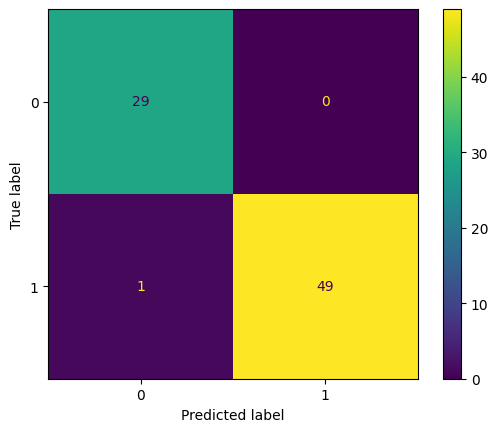

In [169]:
print('Confusion Matrix for SVC')
matrix_svc = confusion_matrix(test_y, pred_y)
print(matrix_svc)
print(matrix_svc.diagonal() / matrix_svc.sum(axis=1))
cm_svc = ConfusionMatrixDisplay(matrix_svc)
cm_svc.plot()

Confusion Matrix for Random Forest

Confusion Matrix for Random Forest
[[29  0]
 [ 0 50]]
[1. 1.]


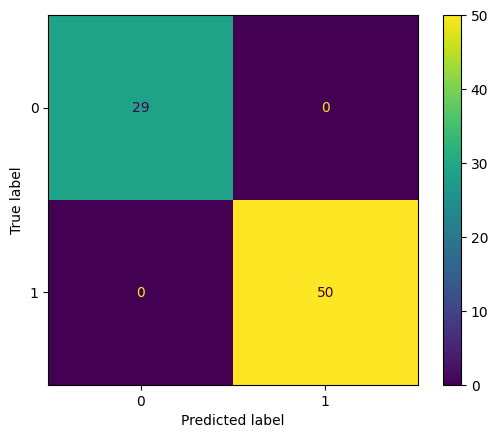

In [170]:

print('Confusion Matrix for Random Forest')
matrix_r = confusion_matrix(test_y, pred_y_r)
print(matrix_r)
print(matrix_r.diagonal() / matrix_r.sum(axis=1))
cm_r = ConfusionMatrixDisplay(matrix_r)
cm_r.plot()

Confusion Matrix for AdaBoost

Confusion Matrix for AdaBoost
[[25  4]
 [ 1 49]]
[0.86206897 0.98      ]


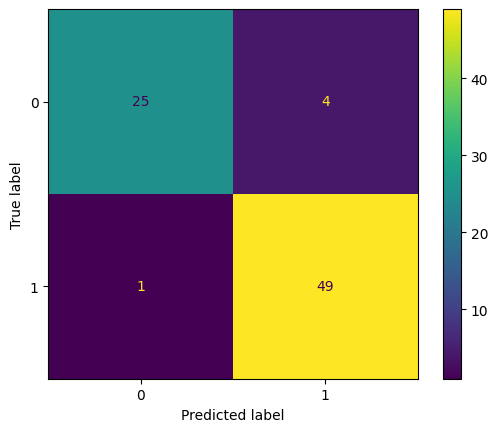

In [171]:
print('Confusion Matrix for AdaBoost')
matrix_a = confusion_matrix(test_y, pred_y_a)
print(matrix_a)
print(matrix_a.diagonal() / matrix_a.sum(axis=1))
cm_a = ConfusionMatrixDisplay(matrix_a)
cm_a.plot()

Confusion Matrix for Decision Tree

Confusion Matrix for DecisionTree
[[28  1]
 [ 3 47]]
[0.96551724 0.94      ]


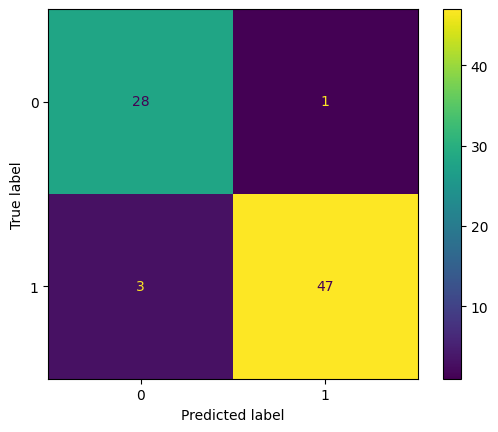

In [172]:
print('Confusion Matrix for DecisionTree')
matrix_d = confusion_matrix(test_y, pred_y_d)
print(matrix_d)
print(matrix_d.diagonal() / matrix_d.sum(axis=1))
cm_d = ConfusionMatrixDisplay(matrix_d)
cm_d.plot()

Confusion Matrix for LightGB

Confusion Matrix for LightGB
[[29  0]
 [ 1 49]]
[1.   0.98]


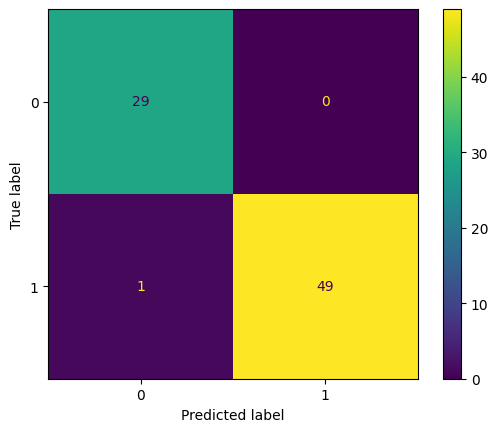

In [173]:
print('Confusion Matrix for LightGB')
matrix_lg = confusion_matrix(test_y, pred_y_lg)
print(matrix_lg)
print(matrix_lg.diagonal() / matrix_lg.sum(axis=1))
cm_lg = ConfusionMatrixDisplay(matrix_lg)
cm_lg.plot()

ROC curve

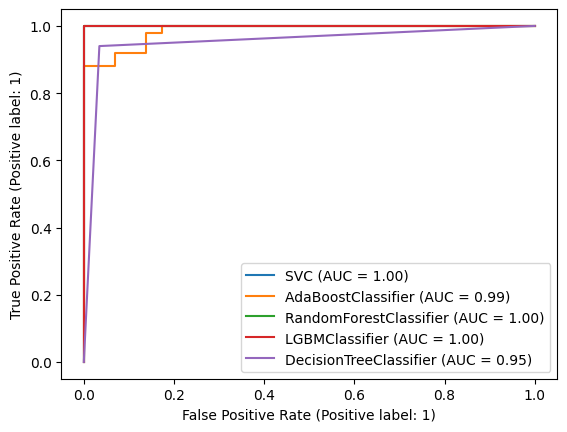

In [174]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
RocCurveDisplay.from_estimator(clf_svc, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_a, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_r, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_LGB, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_d, test_x, test_y, ax=ax)
plt.show()

In [175]:
train_x.shape[1]

16

Deep Learning: MLP models

In [176]:
# Creation of the MLP model

# 1st model

model_1 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# 2nd model

model_2 = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# 3rd model

model_3 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Models compile

In [177]:
epochs = 25
batchs = 5

model_1.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model_2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model_3.compile(
    optimizer='sgd',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

Model_1

In [178]:
history = model_1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_1.summary()

Epoch 1/25
73/73 [==============================] - 2s 6ms/step - loss: 0.6636 - accuracy: 0.6419 - val_loss: 0.5796 - val_accuracy: 0.8333
Epoch 2/25
73/73 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.6804 - val_loss: 0.4935 - val_accuracy: 0.8333
Epoch 3/25
73/73 [==============================] - 0s 4ms/step - loss: 0.5128 - accuracy: 0.7493 - val_loss: 0.4204 - val_accuracy: 0.8462
Epoch 4/25
73/73 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.8017 - val_loss: 0.3598 - val_accuracy: 0.8846
Epoch 5/25
73/73 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.8678 - val_loss: 0.3110 - val_accuracy: 0.8974
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.8705 - val_loss: 0.2772 - val_accuracy: 0.8974
Epoch 7/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.8871 - val_loss: 0.2508 - val_accuracy: 0.9487
Epoch 8/25
73/73 [==

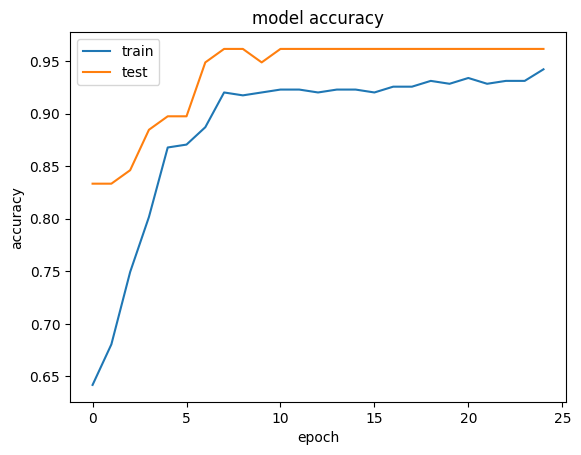

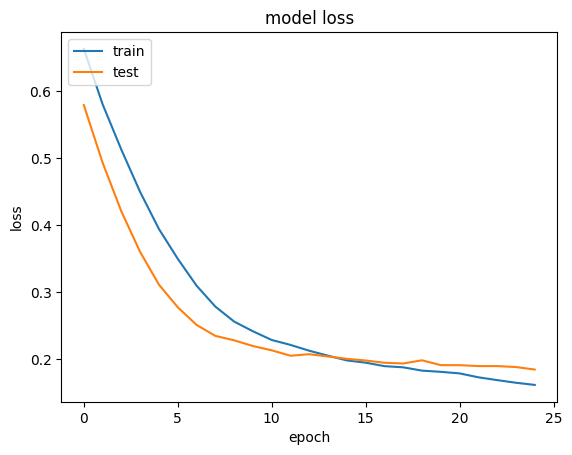

In [179]:
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_1 Performance

In [180]:
print('Model_1 train set performance: ')
model_1.evaluate(train_x, train_y)
print('Model_1 test set performance: ')
model_1.evaluate(test_x, test_y)

Model_1 train set performance: 
12/12 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9477
Model_1 test set performance: 
3/3 [==============================] - 0s 5ms/step - loss: 0.1501 - accuracy: 0.9494


[0.15012802183628082, 0.949367105960846]

3/3 [==============================] - 0s 3ms/step
Confusion Matrix for Model_1
[[27  2]
 [ 2 48]]
[0.93103448 0.96      ]


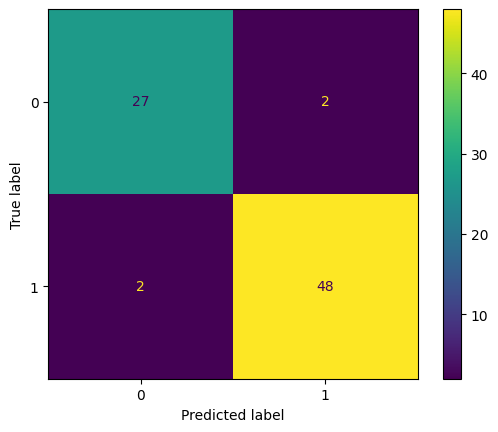

In [181]:
y_pred = model_1.predict(test_x)
y_pred = np.round(y_pred)
print('Confusion Matrix for Model_1')
matrix_model1 = confusion_matrix(test_y, y_pred)
print(matrix_model1)
print(matrix_model1.diagonal() / matrix_model1.sum(axis=1))
cm_1 = ConfusionMatrixDisplay(matrix_model1)
cm_1.plot()

Model_2

In [182]:
history2 = model_2.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_2.summary()

Epoch 1/25
73/73 [==============================] - 1s 6ms/step - loss: 0.6777 - accuracy: 0.6061 - val_loss: 0.6191 - val_accuracy: 0.7436
Epoch 2/25
73/73 [==============================] - 0s 4ms/step - loss: 0.5812 - accuracy: 0.8099 - val_loss: 0.5178 - val_accuracy: 0.8974
Epoch 3/25
73/73 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.8567 - val_loss: 0.4390 - val_accuracy: 0.8846
Epoch 4/25
73/73 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.8705 - val_loss: 0.3830 - val_accuracy: 0.8846
Epoch 5/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8815 - val_loss: 0.3363 - val_accuracy: 0.9103
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.8898 - val_loss: 0.3075 - val_accuracy: 0.8974
Epoch 7/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8926 - val_loss: 0.2840 - val_accuracy: 0.9103
Epoch 8/25
73/73 [==

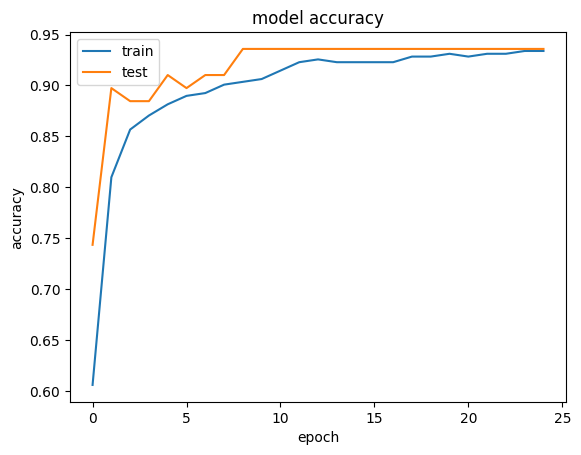

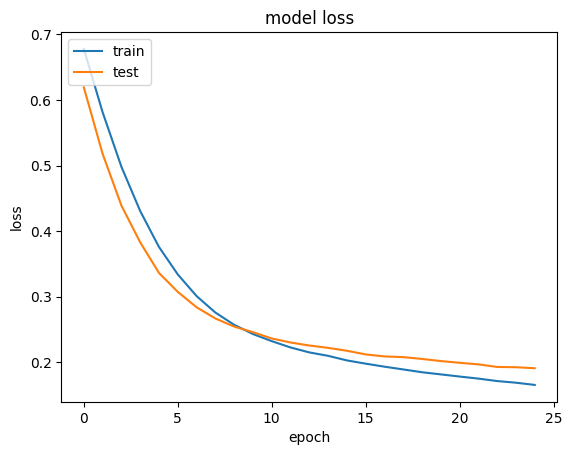

In [183]:
#Model Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_2 Performance

In [184]:
print('Model_2 train set performance: ')
model_2.evaluate(train_x, train_y)
print('Model_2 test set performance: ')
model_2.evaluate(test_x, test_y)

Model_2 train set performance: 
12/12 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9339
Model_2 test set performance: 
3/3 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.9367


[0.17992545664310455, 0.9367088675498962]

3/3 [==============================] - 0s 3ms/step
Confusion Matrix for Model_1
[[25  4]
 [ 1 49]]
[0.86206897 0.98      ]


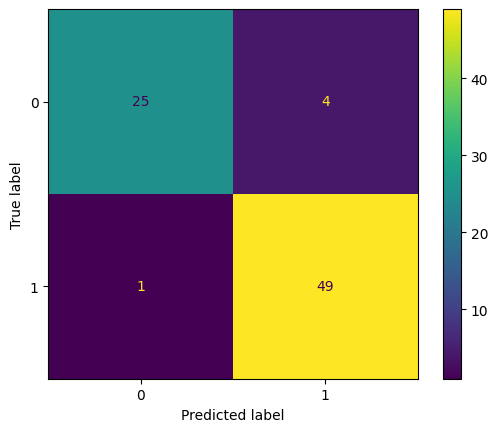

In [185]:
y_pred2 = model_2.predict(test_x)
y_pred2 = np.round(y_pred2)
print('Confusion Matrix for Model_1')
matrix_model2 = confusion_matrix(test_y, y_pred2)
print(matrix_model2)
print(matrix_model2.diagonal() / matrix_model2.sum(axis=1))
cm_2 = ConfusionMatrixDisplay(matrix_model2)
cm_2.plot()

Model_3

In [186]:
history3 = model_3.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs,batch_size = batchs)
model_3.summary()

Epoch 1/25
73/73 [==============================] - 1s 7ms/step - loss: 0.7273 - accuracy: 0.4601 - val_loss: 0.7045 - val_accuracy: 0.5769
Epoch 2/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5399 - val_loss: 0.6765 - val_accuracy: 0.5897
Epoch 3/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5923 - val_loss: 0.6598 - val_accuracy: 0.6282
Epoch 4/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.6336 - val_loss: 0.6456 - val_accuracy: 0.6795
Epoch 5/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6474 - val_loss: 0.6327 - val_accuracy: 0.6923
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6694 - val_loss: 0.6186 - val_accuracy: 0.7564
Epoch 7/25
73/73 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.7603 - val_loss: 0.6043 - val_accuracy: 0.7692
Epoch 8/25
73/73 [==

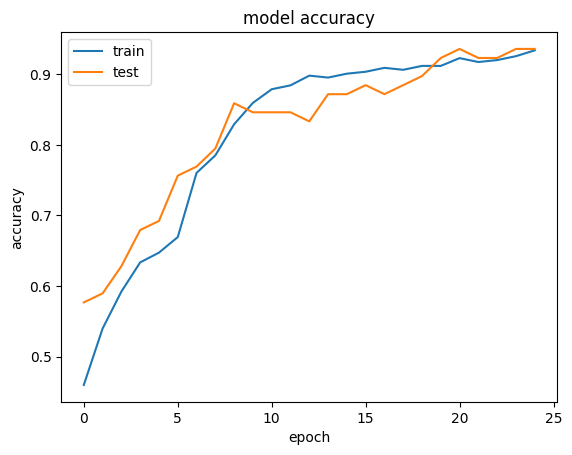

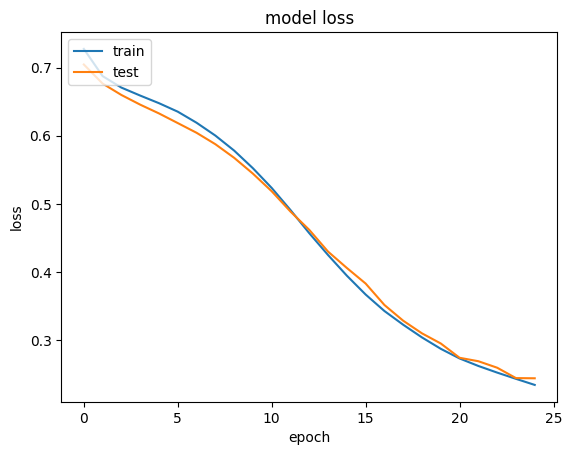

In [187]:
# Model Accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_3 Performance

In [188]:
print('Model_3 train set performance: ')
model_3.evaluate(train_x, train_y)
print('Model_3 test set performance: ')
model_3.evaluate(test_x, test_y)

Model_3 train set performance: 
12/12 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.9256
Model_3 test set performance: 
3/3 [==============================] - 0s 7ms/step - loss: 0.1957 - accuracy: 0.9367


[0.1957099735736847, 0.9367088675498962]

3/3 [==============================] - 0s 5ms/step
Confusion Matrix for Model_3
[[25  4]
 [ 1 49]]
[0.86206897 0.98      ]


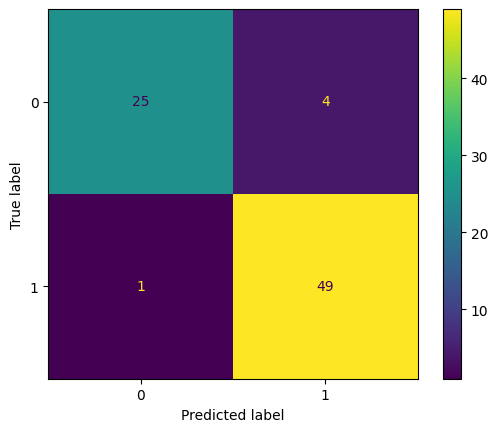

In [189]:
y_pred3 = model_3.predict(test_x)
y_pred3 = np.round(y_pred3)
print('Confusion Matrix for Model_3')
matrix_model3 = confusion_matrix(test_y, y_pred3)
print(matrix_model3)
print(matrix_model3.diagonal() / matrix_model3.sum(axis=1))
cm_3 = ConfusionMatrixDisplay(matrix_model3)
cm_3.plot()

ROC curve

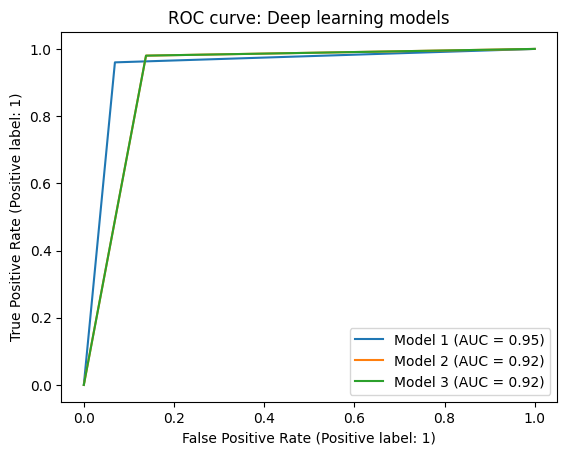

In [190]:
ax = plt.gca()
plt.title('ROC curve: Deep learning models')
RocCurveDisplay.from_predictions(test_y, y_pred, ax=ax, name='Model 1')
RocCurveDisplay.from_predictions(test_y, y_pred2, ax=ax, name='Model 2')
RocCurveDisplay.from_predictions(test_y, y_pred3, ax=ax, name='Model 3')
plt.show()